In [1]:
# Importing Important Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Data Preprocessing Libraries
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Importing the Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Importing the Dataset
df = pd.read_csv('hotel_bookings.csv')

In [5]:
# Displaying the First 10 rows of Dataset
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## Data Preprocessing and Data Cleaning

In [6]:
# Displaying the Total Number of Missing Values present
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Dropping Columns with High Amount of presence of Missing Values
for col in df.columns:
    per = df[col].isnull().sum() / df[col].shape[0]
    if per > 0.3:
        df = df.drop(col, axis=1)

In [8]:
# Since Country and Children have less than 1% of missing values so deleting rows would be a better choice instead of doing imputation for such a small amount of missing data
df = df.dropna(subset=['country'])
df = df.dropna(subset=['children'])

In [9]:
# Exploring Categorical Features
for col in df.columns:
    if df[col].dtype == 'O':
        print(f"{col} :\n{dict(df[col].value_counts())}\n")

hotel :
{'City Hotel': 79302, 'Resort Hotel': 39596}

arrival_date_month :
{'August': 13852, 'July': 12628, 'May': 11779, 'October': 11095, 'April': 11045, 'June': 10927, 'September': 10467, 'March': 9739, 'February': 8012, 'November': 6752, 'December': 6728, 'January': 5874}

meal :
{'BB': 91863, 'HB': 14434, 'SC': 10638, 'Undefined': 1165, 'FB': 798}

country :
{'PRT': 48586, 'GBR': 12129, 'FRA': 10415, 'ESP': 8568, 'DEU': 7287, 'ITA': 3766, 'IRL': 3375, 'BEL': 2342, 'BRA': 2224, 'NLD': 2104, 'USA': 2097, 'CHE': 1730, 'CN': 1279, 'AUT': 1263, 'SWE': 1024, 'CHN': 999, 'POL': 919, 'ISR': 669, 'RUS': 632, 'NOR': 607, 'ROU': 500, 'FIN': 447, 'DNK': 435, 'AUS': 426, 'AGO': 362, 'LUX': 287, 'MAR': 259, 'TUR': 248, 'HUN': 230, 'ARG': 214, 'JPN': 197, 'CZE': 171, 'IND': 152, 'KOR': 133, 'GRC': 128, 'DZA': 103, 'SRB': 101, 'HRV': 100, 'MEX': 85, 'IRN': 83, 'EST': 83, 'LTU': 81, 'ZAF': 80, 'BGR': 75, 'NZL': 74, 'COL': 71, 'UKR': 68, 'MOZ': 67, 'CHL': 65, 'SVK': 65, 'THA': 59, 'SVN': 57, 'ISL':

In [10]:
# Encoding Arrival Date Month Column
enc = {
    'arrival_date_month' : {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12}
}

# Replacing Categorical Value with Encoded Value
df = df.replace(enc)

In [11]:
# Replacing Remaining Categorical Feature Values on the basis of One Hot Encoder Criterion
df = pd.get_dummies(data=df, columns=[col for col in df.columns if df[col].dtype == 'O'])

## Predicting whether or not the person is cancelling the booking

In [12]:
# Separating Features and Class from the Dataset
X = df.drop('is_canceled', axis=1).values
y = df['is_canceled'].values

In [13]:
# Imputing Agent Column Values with Mean
imputer = Imputer(missing_values='NaN', strategy='mean')
X[:, 14:15] = imputer.fit_transform(X[:, 14:15])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
# Splitting the dataset into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Building and Training

In [15]:
# Defining Lists to store the performance of Different Classifiers
classifiers = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier']
scores = []

In [16]:
# Training with Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

In [17]:
# Training with Logistic Regression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Training with Random Forest Classifier
clf3 = RandomForestClassifier(n_estimators=20)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
score = accuracy_score(y_test, y_pred)
scores.append(score)

### Model Evaluation

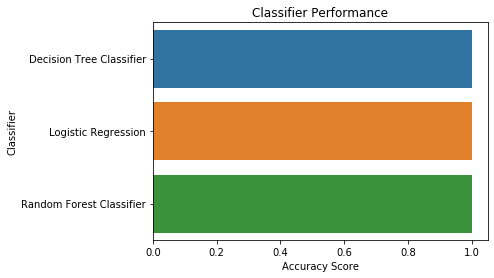

In [19]:
# Evaluating Performance of all the Classifiers
sns.barplot(x=scores, y=classifiers)
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Performance')
plt.show()

#### Since All the Classifiers are doing great so we can proceed with anyone